In [58]:
#import file, reading and showing it

import csv
import gzip
import pandas as pd

g=gzip.open('tn.movie_budgets.csv.gz')
file_content=g.read()

df_1 = pd.read_csv('tn.movie_budgets.csv.gz')
df_1


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [59]:
# Creating a year column
df_1['Year'] = pd.DatetimeIndex(df_1['release_date']).year  


In [60]:
#going to make budget and gross columns into ints so must get rid of $ and commas
#getting rid of $ 
df_1['production_budget']=df_1['production_budget'].apply(lambda x: x.replace('$', ''))
df_1['domestic_gross']=df_1['domestic_gross'].apply(lambda x: x.replace('$', ''))
df_1['worldwide_gross']=df_1['worldwide_gross'].apply(lambda x: x.replace('$', ''))


In [61]:
#getting rid of commas in numbers 
df_1['production_budget']=df_1['production_budget'].apply(lambda x: x.replace(',', ''))
df_1['domestic_gross']=df_1['domestic_gross'].apply(lambda x: x.replace(',', ''))
df_1['worldwide_gross']=df_1['worldwide_gross'].apply(lambda x: x.replace(',', ''))
df_1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,2018
5778,79,"Apr 2, 1999",Following,6000,48482,240495,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,2015


In [62]:
# converting into integers
df_1['production_budget']=df_1['production_budget'].apply(lambda x: int(x))
df_1['domestic_gross']=df_1['domestic_gross'].apply(lambda x:int(x))
df_1['worldwide_gross']=df_1['worldwide_gross'].apply(lambda x:int(x))


In [71]:
#Limiting to past 10 years
df_1=df_1.loc[df_1['Year'] > 2011]
df_1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,foreign_gross
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,107000000
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,944008095
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,696540365
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1116648995
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1369318718
...,...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,2014,0
5771,72,"May 19, 2015",Family Motocross,10000,0,0,2015,0
5772,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,2012,0
5777,78,"Dec 31, 2018",Red 11,7000,0,0,2018,0


In [74]:
# creating a foreign gross column
df_1 ['foreign_gross']= df_1['worldwide_gross']- df_1['domestic_gross']


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,foreign_gross
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,107000000
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,944008095
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,696540365
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1116648995
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1369318718
...,...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,2014,0
5771,72,"May 19, 2015",Family Motocross,10000,0,0,2015,0
5772,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,2012,0
5777,78,"Dec 31, 2018",Red 11,7000,0,0,2018,0


In [75]:
# creating  total profit, worldwide ROI%, domestic ROI%, and foreign ROI% columns

df_1['total_profit']= df_1['worldwide_gross']- df_1['production_budget']
df_1['worldwide_ROI %']= (df_1['worldwide_gross'] / df_1['production_budget'])*100
df_1['domestic_ROI %']= (df_1['domestic_gross'] / df_1['production_budget'])*100
df_1['foreign_ROI %']= (df_1['foreign_gross'] / df_1['production_budget'])*100


In [60]:
# import zipfile
import zipfile
with zipfile.ZipFile("im.db.zip","r") as zip_ref:
    zip_ref.extractall(None)

In [61]:
# opening sqlite3 to access database
import pandas as pd
import sqlite3
import sqlalchemy 

try:
    conn = sqlite3.connect("im.db")    
except Exception as e:
    print(e)

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(f"Table Name : {cursor.fetchall()}")

df = pd.read_sql_query('SELECT * FROM known_for', conn)

Table Name : [('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [62]:
# Selecting movie_basics table to access genres and runtimes
df_0=pd.read_sql("""
SELECT genres,
primary_title,
runtime_minutes
FROM movie_basics

;""", conn)
df_0

,genres,primary_title,runtime_minutes
0,"Action,Crime,Drama",Sunghursh,175.0
1,"Biography,Drama",One Day Before the Rainy Season,114.0
2,Drama,The Other Side of the Wind,122.0
3,"Comedy,Drama",Sabse Bada Sukh,NaN
4,"Comedy,Drama,Fantasy",The Wandering Soap Opera,80.0
...,...,...,...
146139,Drama,Kuambil Lagi Hatiku,123.0
146140,Documentary,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN
146141,Comedy,Dankyavar Danka,NaN
146142,None,6 Gunn,116.0


In [63]:
#joining dataframes 
by_genre_df=df_1.merge(df_0, how= 'inner', left_on='movie', right_on='primary_title')
by_genre_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,foreign_gross,total_profit,worldwide_ROI %,domestic_ROI %,foreign_ROI %,genres,primary_title,runtime_minutes
0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,107000000,-200237650,42.789243,12.217814,30.571429,"Action,Adventure,Sci-Fi",Dark Phoenix,113.0
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,944008095,1072413963,424.384139,138.840250,285.543888,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,141.0
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1369318718,1748134200,682.711400,226.271827,456.439573,"Action,Adventure,Sci-Fi",Avengers: Infinity War,149.0
3,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,2017,426920914,355945209,218.648403,76.341432,142.306971,"Action,Adventure,Fantasy",Justice League,120.0
4,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,2015,679546748,579620923,293.206974,66.691392,226.515583,"Action,Adventure,Thriller",Spectre,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,57,"Apr 21, 2015",The Front Man,20000,0,0,2015,0,-20000,0.000000,0.000000,0.000000,"Biography,Comedy,Documentary",The Front Man,73.0
2054,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,2014,0,-15000,0.000000,0.000000,0.000000,Drama,Stories of Our Lives,60.0
2055,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,2012,0,-4416,50.933333,50.933333,0.000000,"Comedy,Drama",Newlyweds,95.0
2056,78,"Dec 31, 2018",Red 11,7000,0,0,2018,0,-7000,0.000000,0.000000,0.000000,"Horror,Sci-Fi,Thriller",Red 11,77.0


In [64]:
# dropping duplicates
by_genre_df.drop_duplicates(subset='movie', keep='first', inplace=True, ignore_index=False)
by_genre_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,foreign_gross,total_profit,worldwide_ROI %,domestic_ROI %,foreign_ROI %,genres,primary_title,runtime_minutes
0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,107000000,-200237650,42.789243,12.217814,30.571429,"Action,Adventure,Sci-Fi",Dark Phoenix,113.0
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,944008095,1072413963,424.384139,138.840250,285.543888,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,141.0
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1369318718,1748134200,682.711400,226.271827,456.439573,"Action,Adventure,Sci-Fi",Avengers: Infinity War,149.0
3,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,2017,426920914,355945209,218.648403,76.341432,142.306971,"Action,Adventure,Fantasy",Justice League,120.0
4,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,2015,679546748,579620923,293.206974,66.691392,226.515583,"Action,Adventure,Thriller",Spectre,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,57,"Apr 21, 2015",The Front Man,20000,0,0,2015,0,-20000,0.000000,0.000000,0.000000,"Biography,Comedy,Documentary",The Front Man,73.0
2054,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,2014,0,-15000,0.000000,0.000000,0.000000,Drama,Stories of Our Lives,60.0
2055,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,2012,0,-4416,50.933333,50.933333,0.000000,"Comedy,Drama",Newlyweds,95.0
2056,78,"Dec 31, 2018",Red 11,7000,0,0,2018,0,-7000,0.000000,0.000000,0.000000,"Horror,Sci-Fi,Thriller",Red 11,77.0


In [65]:
#re-ordering columns
columnsTitles = ['movie', 'Year', 'genres', 'runtime_minutes','production_budget', 'domestic_gross', 'foreign_gross','worldwide_gross', 'total_profit', 'domestic_ROI %', 'foreign_ROI %', 'worldwide_ROI %']


by_genre_df = by_genre_df.reindex(columns=columnsTitles)
by_genre_df

,movie,Year,genres,runtime_minutes,production_budget,domestic_gross,foreign_gross,worldwide_gross,total_profit,domestic_ROI %,foreign_ROI %,worldwide_ROI %
0,Dark Phoenix,2019,"Action,Adventure,Sci-Fi",113.0,350000000,42762350,107000000,149762350,-200237650,12.217814,30.571429,42.789243
1,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",141.0,330600000,459005868,944008095,1403013963,1072413963,138.840250,285.543888,424.384139
2,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",149.0,300000000,678815482,1369318718,2048134200,1748134200,226.271827,456.439573,682.711400
3,Justice League,2017,"Action,Adventure,Fantasy",120.0,300000000,229024295,426920914,655945209,355945209,76.341432,142.306971,218.648403
4,Spectre,2015,"Action,Adventure,Thriller",148.0,300000000,200074175,679546748,879620923,579620923,66.691392,226.515583,293.206974
...,...,...,...,...,...,...,...,...,...,...,...,...
2053,The Front Man,2015,"Biography,Comedy,Documentary",73.0,20000,0,0,0,-20000,0.000000,0.000000,0.000000
2054,Stories of Our Lives,2014,Drama,60.0,15000,0,0,0,-15000,0.000000,0.000000,0.000000
2055,Newlyweds,2012,"Comedy,Drama",95.0,9000,4584,0,4584,-4416,50.933333,0.000000,50.933333
2056,Red 11,2018,"Horror,Sci-Fi,Thriller",77.0,7000,0,0,0,-7000,0.000000,0.000000,0.000000


In [66]:
# replacing null values in 'genres' and 'runtime_minutes'
by_genre_df['genres'].fillna('Undetermined', inplace=True)
by_genre_df['runtime_minutes'].fillna(by_genre_df['runtime_minutes'].median(), inplace=True)

<AxesSubplot:>

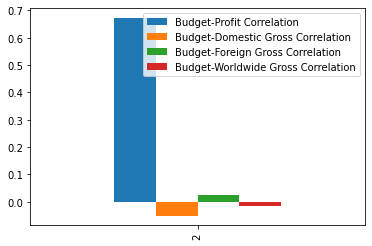

In [75]:
#importing libraries and using them to create a bar graph between production_budget and various return correlations

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
correlations={'Budget-Profit Correlation':by_genre_df['production_budget'].corr(by_genre_df['total_profit']),
                   'Budget-Domestic Gross Correlation':by_genre_df['production_budget'].corr(by_genre_df['domestic_ROI %']),
                   'Budget-Foreign Gross Correlation':by_genre_df['production_budget'].corr(by_genre_df['foreign_ROI %']),
                   'Budget-Worldwide Gross Correlation': by_genre_df['production_budget'].corr(by_genre_df['worldwide_ROI %'])}
data= pd.DataFrame(correlations, index=[2])
data.plot(kind='bar')


In [68]:
# Isolating genres

Adventure=by_genre_df[by_genre_df.genres.str.contains('Adventure')]
Action=by_genre_df[by_genre_df.genres.str.contains('Action')]
Romance=by_genre_df[by_genre_df.genres.str.contains('Romance')]
Drama=by_genre_df[by_genre_df.genres.str.contains('Drama')]
Comedy=by_genre_df[by_genre_df.genres.str.contains('Comedy')]
Horror=by_genre_df[by_genre_df.genres.str.contains('Horror')]
Sci_Fi=by_genre_df[by_genre_df.genres.str.contains('Sci-Fi')]
Thriller=by_genre_df[by_genre_df.genres.str.contains('Thriller')]
Fantasy=by_genre_df[by_genre_df.genres.str.contains('Fantasy')]
Undetermined=by_genre_df[by_genre_df.genres.str.contains('Undetermined')]
Documentary=by_genre_df[by_genre_df.genres.str.contains('Documentary')]
Adventure

,movie,Year,genres,runtime_minutes,production_budget,domestic_gross,foreign_gross,worldwide_gross,total_profit,domestic_ROI %,foreign_ROI %,worldwide_ROI %
0,Dark Phoenix,2019,"Action,Adventure,Sci-Fi",113.0,350000000,42762350,107000000,149762350,-200237650,12.217814,30.571429,42.789243
1,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",141.0,330600000,459005868,944008095,1403013963,1072413963,138.840250,285.543888,424.384139
2,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",149.0,300000000,678815482,1369318718,2048134200,1748134200,226.271827,456.439573,682.711400
3,Justice League,2017,"Action,Adventure,Fantasy",120.0,300000000,229024295,426920914,655945209,355945209,76.341432,142.306971,218.648403
4,Spectre,2015,"Action,Adventure,Thriller",148.0,300000000,200074175,679546748,879620923,579620923,66.691392,226.515583,293.206974
...,...,...,...,...,...,...,...,...,...,...,...,...
1868,Lowriders,2017,"Adventure,Crime,Drama",98.0,916000,6179955,8466,6188421,5272421,674.667576,0.924236,675.591812
1927,Detention of the Dead,2013,"Action,Adventure,Comedy",87.0,500000,1778,0,1778,-498222,0.355600,0.000000,0.355600
1950,Rodeo Girl,2015,"Adventure,Family",108.0,500000,0,0,0,-500000,0.000000,0.000000,0.000000
1978,The Love Letter,2015,"Adventure,Documentary",12.0,250000,0,0,0,-250000,0.000000,0.000000,0.000000


(-1.0, 1.0)

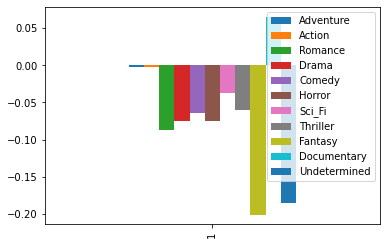

In [69]:
#Domestic ROI correlation  by genre
domestic_genre_cor= {'Adventure': Adventure['production_budget'].corr(Adventure['domestic_ROI %']), 
           'Action': Action['production_budget'].corr(Action['domestic_ROI %']),
           'Romance':Romance['production_budget'].corr(Romance['domestic_ROI %']),
           'Drama':Drama['production_budget'].corr(Drama['domestic_ROI %']),
           'Comedy':Comedy['production_budget'].corr(Comedy['domestic_ROI %']),
           'Horror':Horror['production_budget'].corr(Horror['domestic_ROI %']),
           'Sci_Fi':Sci_Fi['production_budget'].corr(Sci_Fi['domestic_ROI %']),
           'Thriller':Thriller['production_budget'].corr(Thriller['domestic_ROI %']),
           'Fantasy':Fantasy['production_budget'].corr(Fantasy['domestic_ROI %']),
           'Documentary': Documentary['production_budget'].corr(Documentary['domestic_ROI %']),
           'Undetermined':Undetermined['production_budget'].corr(Undetermined['domestic_ROI %'])}
Genre_Correlation =pd.DataFrame(domestic_genre_cor, index=[1])
Genre_Correlation.plot(kind='bar')
ax.set_ylim([-1,1])

<AxesSubplot:>

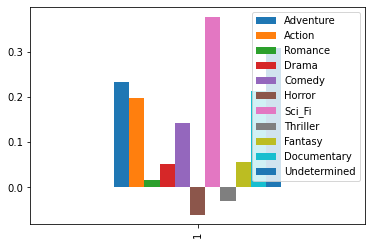

In [81]:
#Foreign ROI correlation by genre
more_cor_1= {'Adventure': Adventure['production_budget'].corr(Adventure['foreign_ROI %']), 
           'Action': Action['production_budget'].corr(Action['foreign_ROI %']),
           'Romance':Romance['production_budget'].corr(Romance['foreign_ROI %']),
           'Drama':Drama['production_budget'].corr(Drama['foreign_ROI %']),
           'Comedy':Comedy['production_budget'].corr(Comedy['foreign_ROI %']),
           'Horror':Horror['production_budget'].corr(Horror['foreign_ROI %']),
           'Sci_Fi':Sci_Fi['production_budget'].corr(Sci_Fi['foreign_ROI %']),
           'Thriller':Thriller['production_budget'].corr(Thriller['foreign_ROI %']),
           'Fantasy':Fantasy['production_budget'].corr(Fantasy['foreign_ROI %']),
           'Documentary': Documentary['production_budget'].corr(Documentary['foreign_ROI %']),
           'Undetermined':Undetermined['production_budget'].corr(Undetermined['foreign_ROI %'])}
Genre_Corre =pd.DataFrame(more_cor_1, index=[1])
Genre_Corre.plot(kind='bar')


<AxesSubplot:>

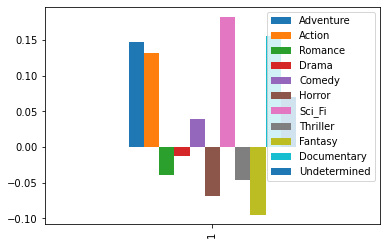

In [82]:
# Worldwide ROI correlation by genre
more_cor_2= {'Adventure': Adventure['production_budget'].corr(Adventure['worldwide_ROI %']), 
           'Action': Action['production_budget'].corr(Action['worldwide_ROI %']),
           'Romance':Romance['production_budget'].corr(Romance['worldwide_ROI %']),
           'Drama':Drama['production_budget'].corr(Drama['worldwide_ROI %']),
           'Comedy':Comedy['production_budget'].corr(Comedy['worldwide_ROI %']),
           'Horror':Horror['production_budget'].corr(Horror['worldwide_ROI %']),
           'Sci_Fi':Sci_Fi['production_budget'].corr(Sci_Fi['worldwide_ROI %']),
           'Thriller':Thriller['production_budget'].corr(Thriller['worldwide_ROI %']),
           'Fantasy':Fantasy['production_budget'].corr(Fantasy['worldwide_ROI %']),
           'Documentary': Documentary['production_budget'].corr(Documentary['worldwide_ROI %']),
           'Undetermined':Undetermined['production_budget'].corr(Undetermined['worldwide_ROI %'])}
Genre_Corre =pd.DataFrame(more_cor_2, index=[1])
Genre_Corre.plot(kind='bar')


In [72]:
#Creating new tables based on runtime
# median runtime is 103
run=by_genre_df["runtime_minutes"]
# Up to 80 minutes
short_film = by_genre_df[run <= 80]
# From 80+ to 116 minutes
average_length_film = by_genre_df[(run >80 )& (run <= 116) ]
# Over 116 minutes
long_film = by_genre_df[run > 116]

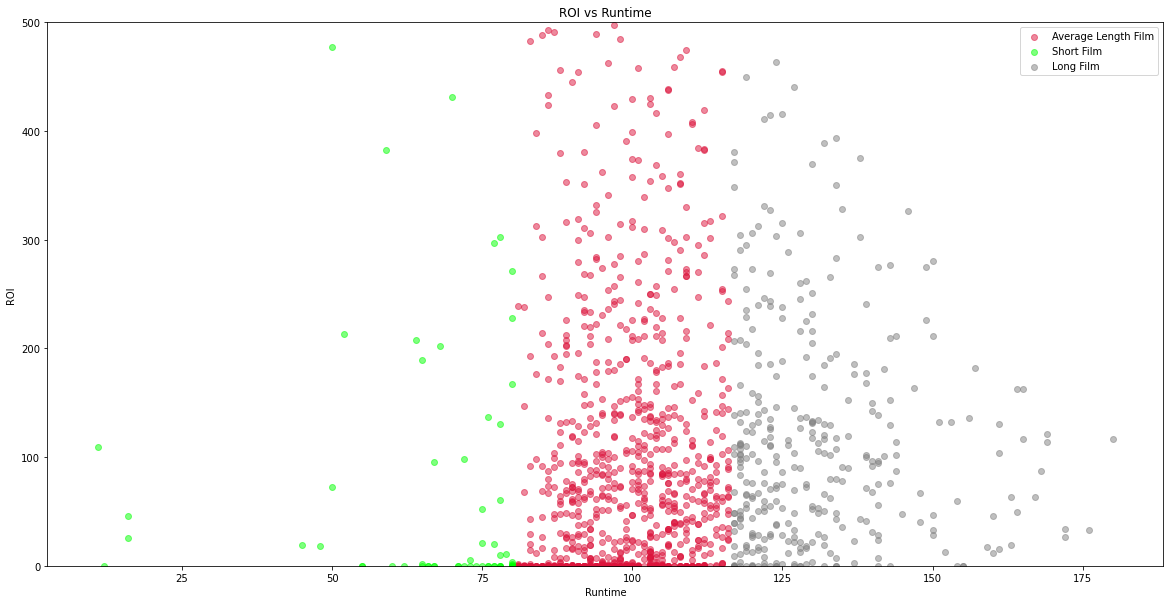

In [73]:
# ROI vs Runtime Scatter Plot
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(
    y=average_length_film['domestic_ROI %'],
    x=average_length_film['runtime_minutes'],
    alpha=.5,
    color="crimson",
    label="Average Length Film"
)
ax.scatter(
    y=short_film['domestic_ROI %'],
    x=short_film['runtime_minutes'],
    alpha=.5,
    color="lime",
    label="Short Film"
)
ax.scatter(
    y=long_film['domestic_ROI %'],
    x= long_film['runtime_minutes'],
    alpha=.5,
    color="gray",
    label="Long Film"
)
ax.set_xlabel("Runtime")
ax.set_ylabel("ROI ")
ax.set_title("ROI vs Runtime")
ax.set_ylim([0, 500])
ax.legend();

In [ ]:
conn.close()